# Polynomial Interpolation, Chebyshev Points, Splines, Image Reconstruction
### Sept. 2019

## Problem 1
### 1a)

Use the following code to find the polynomial Lagrange interpolant of the given points: 


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

n = np.array([1, 2, 3, 4, 5])
gamma_n = np.array([1, 1, 2, 6, 24])
def g(x):
    return lagrange(x, gamma_n)

print(g(n))


       4         3         2
0.375 x - 3.417 x + 11.62 x - 16.58 x + 9


So the interpolant $g(x)$ is given by:

$
g(x) = 0.375x^4 - 3.417x^3 + 11.62x^2 - 16.58x + 9
$

### 1b)
Use a similar method to construt a second approximation $h(x)$ by first calculating the fourth order polynomial $p(x)$ that interpolates the points $(n, log(\Gamma(n)))$ for $n = 1,2,3,4,5$. 

In [145]:
def log_gamma_n():
    return np.log(gamma_n)

def p(x):
    return lagrange(x, log_gamma_n())

print(p(n))

          4          3         2
0.007079 x - 0.1187 x + 0.882 x - 1.921 x + 1.151


Now that we know $p(x) = 0.007079x^4 - 0.1187x^3 + 0.882x^2 -1.921x + 1.151$, find $h(x)$ by defining the approximation $h(x)=e^{p(x)}$:

$
h(x) = e^{0.007079x^4 - 0.1187x^3 + 0.882x^2 -1.921x + 1.151}
$

### 1c) 
Now, I plot $\Gamma(x)$, $g(x)$, and $h(x)$ on the interval $1 \leq x \leq 5$:

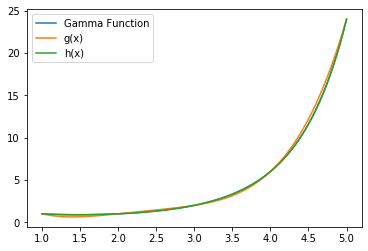

In [146]:
from scipy.special import gamma

x = np.linspace(1,5,2000)

plt.plot(x, gamma(x), label="Gamma Function")
plt.plot(x, np.polyval(g(n),x), label="g(x)")
plt.plot(x, np.exp(np.polyval(p(n),x)), label="h(x)")

plt.legend()
plt.show()

### 1d)
Finally, I calculate the maximum relative error of $g(x)$ and $h(x)$ [relative to $\Gamma(x)$] on this interval.

In [147]:

gamma_g_diff_list = abs(gamma(x)-np.polyval(g(n),x))
i=(np.argmax(gamma(x)-np.polyval(g(n),x)))
gamma_g_maxdiff = gamma_g_diff_list[i]


gamma_h_diff_list = abs(gamma(x)-np.exp(np.polyval(p(n),x)))
i=(np.argmax(gamma(x)-np.exp(np.polyval(p(n),x))))
gamma_h_maxdiff = gamma_h_diff_list[i]

print(gamma_g_maxdiff)
print(gamma_h_maxdiff)

0.25410708655164027
0.06640974610068184


So we find that the maximum relative error of $g(x)$ is 0.25411 and the maximum relative error of $h(x)$ is 0.06641, meaning that the $g(x)$ function has a greater maximum relative error than the $h(x)$ function.

Thus, we see the $h(x)$ approximation is more accurate.

## Problem 2
### 2a)


Below I define a function to calculate and plot the Lagrange polynomial of $f(x) = e^{-3x} + e^{2x}$ at the Chebyshev points $x_j = cos((2j-1)\pi/2n)$ for $j=1,...,n$. 

Lagrange polynomial is below: 
         3         2
-5.325 x + 11.64 x - 0.7229 x + 1.337


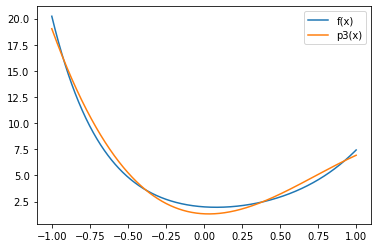

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

def calc_plot_lagrange(n, xvals):
    #Generate Chebyshev points
    cheby_xs = []
    for j in range(1,n+1):
        cheby_xs.append(np.cos(((2*j-1)*(np.pi))/(2*n)))

    #Calculate f(x) = e^(-3x) + e^(2x) with x = Chebyshev points
    ys = []
    for x in cheby_xs:
        ys.append(np.exp(-3*x) + np.exp(2*x))
    
    #Calculate Lagrange Polynomial
    pnminusone_x = lagrange(cheby_xs, ys)
    print("Lagrange polynomial is below:", "\n", pnminusone_x)
    
    plt.plot(xvals, (np.exp(-3*xvals) + np.exp(2*xvals)), label='f(x)')
    plt.plot(xvals, np.polyval(pnminusone_x, xvals), label='p3(x)')
    plt.legend()
    plt.show()
    
    return

calc_plot_lagrange(4, np.linspace(-1, 1, 1000))

So the Lagrange polynomial for these points is given by:

$
p_3(x) = -5.325x^3 + 11.64x^2 - 0.7229x + 1.337
$

and the plot above shows $f(x)$ and $p_3(x)$ over the range [-1, 1] with $n=4$.

### 2b)

I now find $||f-p_3||$ by sampling the function at 1,000 equally spaced points over [-1,1]:

In [149]:
n=4
xvals = np.linspace(-1, 1, 1000)
cheby_xs = []
for j in range(1,n+1):
    cheby_xs.append(np.cos(((2*j-1)*(np.pi))/(2*n)))

#Calculate f(x) = e^(-3x) + e^(2x) with x = Chebyshev points
ys = []
for x in cheby_xs:
    ys.append(np.exp(-3*x) + np.exp(2*x))

pnminusone_x = lagrange(cheby_xs, ys)

#Calculate the difference between the two functions and 
#then take the norm of the result. 

f = np.exp(-3*xvals) + np.exp(2*xvals)
p3 = np.polyval(pnminusone_x, xvals)

inf_norm = max(abs(f-p3))

print(inf_norm)

1.192488634786617


So we have $||f-p_3|| = 1.1925$ 

### 2c)

We want to find an upper bound for $||f-p_n||_\infty$ for any positive integern $n$, and we know:
$
f(x) - p_{n-1}(x) = \frac{f^{(n)}(\theta)}{n!}(x-x_1)(x-x_2)...(x-x_n)
$

We begin by taking the numerator, and seeing if we can identify a pattern as we take the $n$th derivative of the function $f(x) = e^{-3x} - e^{2x}$:

$
f(x) = e^{-3x} - e^{2x}
$

$
f^{(1)}(x) = -3e^{-3x} + 2e^{2x}
$

$
f^{(2)}(x) = 9e^{-3x} + 4e^{2x}
$

$
f^{(3)}(x) = -27e^{-3x} + 8e^{2x}
$

$
f^{(4)}(x) = 81e^{-3x} + 16e^{2x}
$

So we can identify the general pattern:

If n is even: $f^{(n)}(x) = 3^ne^{-3x} + 2^ne^{2x}$

If n is odd: $f^{(n)}(x) = -3^ne^{-3x} + 2^ne^{2x}$

Since $f^{(n)}(x)$ is monotonic, the maximum will occur at one of the end points (-1 or 1), so let's test both: 
$
f^{(n)}(1) = 3^n(0.049) + 2^n(7.39)
$

$
f^{(n)}(-1) = -3^n(20.09) + 2^n(0.14)
$

Since we are looking for the infinity norm, we are only interested in the magnitude of each case, and can thus disregard the sign. So we conclude that the function's norm is maximized at $x=-1$, where $f^{(n)}(x) = -3^ne^{-3x} + 2^ne^{2x}$.

Now we turn to the $(x-x_1)(x-x_2)...(x-x_n)$ term.

Since we are interested in the upper bound, we consider the "worst case scenario," when all of our Chebyshev points are as far as possible from the real point $x$. 

On the interval [-1,1], this would occur when all points are on one side, and the $x$ is on the other. For each term, then, $(x-x_n) = 2$, and since there are $n$ points, the portion of the equation that reads:
$
(x-x_1)(x-x_2)...(x-x_n)
$

becomes $2^n$.



So we combine all the terms (leaving $n!$ unchanged) to get our result. 

Therefore, the upper bound for $||f-p_n||_\infty$ is:
$
\frac{(-3^ne^3 + 2^ne^{-2})(2^n)}{n!}
$


### 2d)

To find a cubic polynomial $p_3^+$ such that $||f-p_3^+|| < ||f-p_3||$, slightly adjust one of the coefficients on the polynomial:

In [150]:
new_p = np.polyval((pnminusone_x + [0,0,-0.25,0]), xvals)
new_inf_norm = max(abs(f-new_p))
print(pnminusone_x + [0,0,-0.25,0])
print(new_inf_norm)

        3         2
-5.325 x + 11.64 x - 0.9729 x + 1.337
1.156381284847205


So the polynomial $p_3^+ = -5.325x^3 + 11.64x^2 - 0.9729x + 1.337$ provides an infinity norm of 1.16, which is less than the 1.19 infinity norm from above. 



## Problem 3

### 3a)

2x2 invertible matrices B and C such that $\kappa(B+C) < \kappa(B) + \kappa(C)$

are the first set: 

$$
    \mathbf{B} = \left(
        \begin{array}{cc}
            3 & 0 \\
            0 & 4
        \end{array} \right)
        %
    \mathbf{C} = \left(
        \begin{array}{cc}
            1 & 0 \\
            0 & 2
        \end{array} \right)
$$

and the second set: 


$$
    \mathbf{B} = \left(
        \begin{array}{cc}
            4 & 0 \\
            0 & 40
        \end{array} \right)
    \mathbf{C} = \left(
        \begin{array}{cc}
            50 & 0 \\
            0 & 2
        \end{array} \right)
$$

The code below shows the $\kappa(B+C)$ and $\kappa(B) + \kappa(C)$ values for each.



In [151]:
import numpy as np

B = np.array([[3,0], [0,4]])
C = np.array([[1,0], [0,2]])

print('B', B)
print('C', C)

k_B = np.linalg.norm(B) * np.linalg.norm(np.linalg.inv(B))
k_C = np.linalg.norm(C) * np.linalg.norm(np.linalg.inv(C))
k_BC = np.linalg.norm(B+C) * np.linalg.norm(np.linalg.inv(B+C))

print('k(B+C)', k_BC)
print('k(B) + k(C):', k_B + k_C)

B [[3 0]
 [0 4]]
C [[1 0]
 [0 2]]
k(B+C) 2.1666666666666665
k(B) + k(C): 4.583333333333334


In [152]:

B = np.array([[4,0], [0,40]])
C = np.array([[50,0], [0,2]])


print('B', B)
print('C', C)

k_B = np.linalg.norm(B) * np.linalg.norm(np.linalg.inv(B))
k_C = np.linalg.norm(C) * np.linalg.norm(np.linalg.inv(C))
k_BC = np.linalg.norm(B+C) * np.linalg.norm(np.linalg.inv(B+C))

print('k(B+C)', k_BC)
print('k(B) + k(C):', k_B + k_C)

B [[ 4  0]
 [ 0 40]]
C [[50  0]
 [ 0  2]]
k(B+C) 2.0634920634920637
k(B) + k(C): 35.14


### 3b)

2x2 invertible matrices B and C such that $\kappa(B+C) > \kappa(B) + \kappa(C)$

are the first set: 

$$
    \mathbf{B} = \left(
        \begin{array}{cc}
            1 & 1 \\
            1 & 0
        \end{array} \right)
        %
    \mathbf{C} = \left(
        \begin{array}{cc}
            1 & 0 \\
            0 & 1
        \end{array} \right)
$$

and the second set: 


$$
    \mathbf{B} = \left(
        \begin{array}{cc}
            2.5 & 1 \\
            1 & 0.001
        \end{array} \right)
    \mathbf{C} = \left(
        \begin{array}{cc}
            40 & 0 \\
            41 & 1
        \end{array} \right)
$$

The code below shows the $\kappa(B+C)$ and $\kappa(B) + \kappa(C)$ values for each.

In [153]:

B = np.array([[1,1], [1,0]])
C = np.array([[1,0], [0,1]])

print('B', B)
print('C', C)

k_B = np.linalg.norm(B) * np.linalg.norm(np.linalg.inv(B))
k_C = np.linalg.norm(C) * np.linalg.norm(np.linalg.inv(C))
k_BC = np.linalg.norm(B+C) * np.linalg.norm(np.linalg.inv(B+C))

print('k(B+C)', k_BC)
print('k(B) + k(C):', k_B + k_C)

B [[1 1]
 [1 0]]
C [[1 0]
 [0 1]]
k(B+C) 7.000000000000001
k(B) + k(C): 5.0


In [154]:

B = np.array([[2.5,1], [1,0.001]])
C = np.array([[40,0], [41,1]])

print('B', B)
print('C', C)

k_B = np.linalg.norm(B) * np.linalg.norm(np.linalg.inv(B))
k_C = np.linalg.norm(C) * np.linalg.norm(np.linalg.inv(C))
k_BC = np.linalg.norm(B+C) * np.linalg.norm(np.linalg.inv(B+C))

print('k(B+C)', k_BC)
print('k(B) + k(C):', k_B + k_C)

B [[2.5e+00 1.0e+00]
 [1.0e+00 1.0e-03]]
C [[40  0]
 [41  1]]
k(B+C) 6584.796315207451
k(B) + k(C): 90.32067769423558


## Problem 4

#### 4a)

If you don't know that SciPy can do this automatically, you can do what I inefficiently (and thus foolishly) did, and find the cubic spline for each section of the graph manually. 

Begin with three graphs (one for each segment):

$
s_0(t) = a_0 + b_0(t) + c_0(t)^2 + d_0(t)^3
$

We know that at (0,0), $s_0(0) = 0$ so $a_0$.

Because the other endpoint for the first section is (1,1), we know that $s_0(1) = a_0 + b_0 + c_0 + d_0$ and thus we have: $b_0 + c_0 +d_0 = 1$.

Now we move to the next segment. Note that the x terms are adjusted to reflect the fact that we are 1 away from the origin. 

$
s_1(t) = a_1 + b_1(t-1) + c_1(t-1)^2 + d_1(x-1)^3
$

Because the segment is bounded by (1,1) and (2,-1), we have:

$
s_1(1) = 1 = a_1
$

and 

$
s_1(2) = -1 = a_1 + b_1(1) + c_1(1)^2 + d_1(1)^3
$

which gives $b_1 + c_1 + d_1 = -2$.

Moving to the next segment, we have:

$
s_2(t) = a_2 + b_2(t-2) + c_2(t-2)^2 + d_2(t-2)^3
$

Because the segment is bounded by (2,-1) and (3,0), we have $s_2(2) = -1 = a_2$ and $b_2 + c_2 + d_2 = 1$. This second bound comes from the fact that the function is periodic. 

Now, we look at the conditions imposed by the fact that the curve must be differentiable between $x=0$ and $x=3$. 

So we know that $s_0^{'}(t) = s_1^{'}(t)$ at (1,1), which gives us $b_0 + 2c_0 + 3d_0 - b_1 = 0$.

Similarly, we know that $s_1^{'}(t) = s_2^{'}(t)$ at (2, -1), which gives us $b_1 + 2c_1 + 3d_1 - b_2 = 0$.

And because the function is periodic, we know $s_0^{'}(0) = s_0^{'}(3)$ which gives us $-b_0 + b_2 + 2c_2 + 3d_2 = 0$. 

Just as we did for the first derivatives, we can do for the second derivatives. So we have $s_0^{''}(1) = s_1^{''}(1)$ which gives us $c_0 + 3d_0 - c_1 = 0$. Doing the same for the second and third segment at the point $t=2$ gives us $c_1 + 3d_1 - c_2 = 0$, and by periodicity, we have a similar situation between the first and third segment, so we get $c_0 - c_2 - 3d_2 = 0$.

So we now have 12 unknowns and 12 equations. We can plug this into Python to get the following: $a_0 = 0, b_0 = 2, c_0 = 0, d_0 = -1; a_1 = 1, b_1 = -1, c_1 = -3, d_1 = 2; a_2 = -1, b_2 = -1, c_2 = 3, d_2 = -1$.

The code for this is here:


In [155]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
import math


A = ([[1,0,0,0,0,0,0,0,0,0,0,0], [0,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,0,0,0,0,0,0,0], [0,0,0,0,0,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,0,0,0], [0,0,0,0,0,0,0,0,0,1,1,1], [0,1,2,3,0,-1,0,0,0,0,0,0], [0,0,0,0,0,1,2,3,0,-1,0,0], [0,-1,0,0,0,0,0,0,0,1,2,3], [0,0,1,3,0,0,-1,0,0,0,0,0], [0,0,0,0,0,0,1,3,0,0,-1,0], [0,0,1,0,0,0,0,0,0,0,-1,-3]])

b = [0,1,1,-2,-1,1,0,0,0,0,0,0]


coefficients = solve(A, b)
print(coefficients)


[ 0.  2.  0. -1.  1. -1. -3.  2. -1. -1.  3. -1.]


So our cubic spline $s_x(t)$ is as follows:

On interval $t=[0,1)$:

$
s_0(t) = 2(t) - (t)^3
$

On interval $t=([1,2)$:

$
s_1(t) = 1 - (t-1) -3(t-1)^2 +2(t-1)^3
$

On interval $t=[2,3)$:

$
s_2(t) = -1 - (t-2) + 3(t-2)^2 - (t-2)^3
$

Alternatively, once we realize that SciPy can do this automatically, you can run the following code: 

In [156]:
from scipy import interpolate

xs = [0, 1, 2, 3]
ys = [0, 1, -1, 0]

sx_t = interpolate.CubicSpline(xs, ys, bc_type='periodic')
print(sx_t.c)

[[-1.  2. -1.]
 [ 0. -3.  3.]
 [ 2. -1. -1.]
 [ 0.  1. -1.]]


The above output matches our answers from above! Just be aware the coefficients are ordered differently. 

#### 4b)
The plot below shows $s_x(t)$ and $\frac{2}{\sqrt3}sin\frac{2\pi t}{3}$ on the interval [0,3).

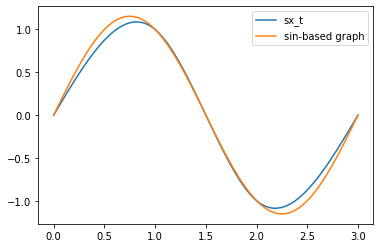

In [157]:

def sin_like(q):
    return (2/(3**0.5))*math.sin((2*np.pi*q)/3)

sin_sim = np.vectorize(sin_like)

t=np.linspace(0,3,100)

plt.plot(t, sx_t(t),label='sx_t')
plt.plot(t, sin_sim(t),label='sin-based graph')
plt.legend()
plt.show()

#### 4c) 
Construct the second cubic spline the more efficient way: 

In [158]:
from scipy import interpolate

xs = [0, 1, 2, 3]
ys = [2, -1, -1, 2]

sy_t = interpolate.CubicSpline(xs, ys, bc_type='periodic')
print(sy_t.c)

[[ 3.00000000e+00  4.44089210e-16 -3.00000000e+00]
 [-6.00000000e+00  3.00000000e+00  3.00000000e+00]
 [-1.11022302e-16 -3.00000000e+00  3.00000000e+00]
 [ 2.00000000e+00 -1.00000000e+00 -1.00000000e+00]]


So our second cubic spline $s_y(t)$ is as follows:

On interval $t=[0,1)$:

$
s_0(t) = 2 - 6(t)^2 + 3(t)^3
$

On interval $t=([1,2)$:

$
s_1(t) = -1 - 3(t-1) + 3(t-1)^2
$

On interval $t=[2,3)$:

$
s_2(t) = -1 + 3(t-2) + 3(t-2)^2 - 3(t-2)^3
$

The plot below shows $s_y(t)$ and $2cos\frac{2\pi t}{3}$ on the interval [0,3).

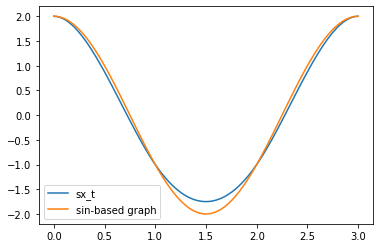

In [159]:
def cos_like(q):
    return (2*math.cos((2*np.pi*q)/3))

cos_sim = np.vectorize(cos_like)

t=np.linspace(0,3,100)

plt.plot(t, sy_t(t),label='sx_t')
plt.plot(t, cos_sim(t),label='sin-based graph')
plt.legend()
plt.show()

#### 4d)
Below we plot the parametric curve $(\frac{\sqrt3}{2}s_x(t), \frac{1}{2}s_y(t))$ for $t$ on [0,3).

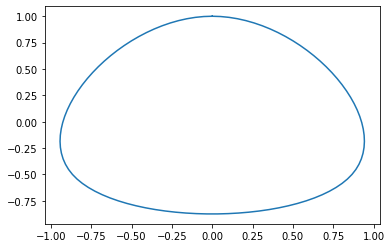

In [160]:
plt.plot(((3**0.5)/2)*sx_t(t), 0.5*sy_t(t))
plt.show()

Now calculate the area enclosed by the curve, and use that to find pi:

In [162]:
from scipy import integrate

sx_t_diff = sx_t.derivative()
sy_t_diff = sy_t.derivative()

def blob_area(t):
    vector1 = [np.sqrt(3)/2*sx_t(t), 0.5*sy_t(t)]
    vector2 = [np.sqrt(3)/2*sx_t_diff(t), 0.5*sy_t_diff(t)]
    radius = abs(np.max(vector1)) + abs(np.max(vector2))/2
    return 0.5*abs(np.cross(vector1, vector2))

area = integrate.quad(blob_area,0,3)

#Don't forget that we just found the area, not pi. to get an estimate 
#for pi, we use A = pi*(radius**2)

radius = (abs(np.max(0.5*sy_t(t))) + abs(np.min(0.5*sy_t(t))))/2
#Note, we can exploit the shape's 3-way symmetry to recognize this radius is constant.


print("Our pi estimate is", area[0]/(radius**2))
    

Our pi estimate is 3.1049754292998952


So we estimate that pi is 3.10498. 

#### 4e)
Repeat the process for the functions $w_x(t) = \gamma\sqrt3(s_x(t)-s_x(t-\frac{3}{2}))$ and $w_y(t) = \gamma(s_y(t) - s_y(t-\frac{3}{2}))$, where $\gamma = 1/(s_y(0) - s_y(\frac{3}{2}))$.

Our new pi estimate is 3.1280837584937484


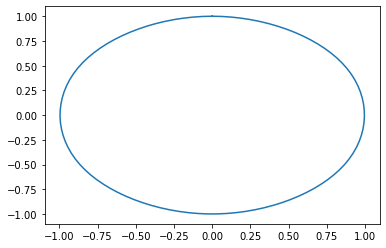

In [163]:
gam = 1/(sy_t(0)-sy_t(3/2))

def wx(t):
    return gam*np.sqrt(3) * (sx_t(t) - sx_t(t-1.5))
def wy(t):
    return gam * (sy_t(t) - sy_t(t-1.5))

plt.plot(wx(t), wy(t))

def wx_diff(t):
    return gam*np.sqrt(3) * (sx_t_diff(t) - sx_t_diff(t-1.5))
def wy_diff(t):
    return gam * (sy_t_diff(t) - sy_t_diff(t-1.5))

def egg_area(t):
    wvector1 = [wx(t), wy(t)]
    wvector2 = [wx_diff(t), wy_diff(t)]
    return 0.5*abs(np.cross(wvector1, wvector2))

area_2 = integrate.quad(egg_area,0,3)

#Note that we don't have to divide by the radius, since r=1 here, so
#diving by 1**2 wouldn't do anything. 
print("Our new pi estimate is", area_2[0])

So our new $\pi$ estimate is 3.12808, which is an improvement over our prior attempt. Note that since our radius is 1 here, dividing by the radius squred won't change anything. 

## Problem 5

#### 5a)
See the code below: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of A is (480000, 10)
Shape of B is (480000, 3)
All 30 comoponents are:  [[ 1.5548013   0.80570412  0.68068539]
 [ 0.72566254  1.80281398 -0.28544404]
 [-1.37030476 -1.7184254  -0.36437461]
 [-0.18472715 -0.36957958 -0.06315937]
 [ 0.18138465  0.58711053  0.38776738]
 [ 0.32222399  0.29750114  1.0048939 ]
 [ 0.77469911 -0.16700119 -0.31005226]
 [-0.62014575  0.19949871 -0.30350935]
 [-2.21131807 -1.57263159  0.70675161]
 [ 0.06091733  0.04468686 -0.00625387]]
S is:  0.004493319476053458
Shape of RGB_constructed is (480000, 3)
Shape of RGB_tensor is (600, 800, 3)
Reconstructed regular image is here:


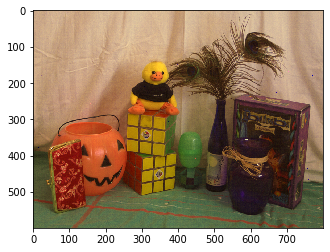

Compare to the original regular image, which is here:


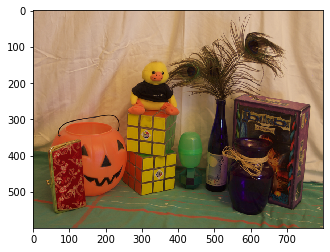

In [164]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy import linalg

# Load in the image, and explicitly convert it to float64.
# Scale the values to be over the range from 0 to 1.
L1=io.imread("low1.png").astype(np.float64);L1*=1/255.0
L2=io.imread("low2.png").astype(np.float64);L2*=1/255.0
L3=io.imread("low3.png").astype(np.float64);L3*=1/255.0
ORIG=io.imread("regular.png").astype(np.float64);ORIG*=1/255.0


#Slice the three color components from each
R_L1=L1[:,:,0].reshape(480000,1)
R_L2=L2[:,:,0].reshape(480000,1)
R_L3=L3[:,:,0].reshape(480000,1)
R_ORIG=ORIG[:,:,0].reshape(480000,1)

G_L1=L1[:,:,1].reshape(480000,1)
G_L2=L2[:,:,1].reshape(480000,1)
G_L3=L3[:,:,1].reshape(480000,1)
G_ORIG=ORIG[:,:,1].reshape(480000,1)

B_L1=L1[:,:,2].reshape(480000,1)
B_L2=L2[:,:,2].reshape(480000,1)
B_L3=L3[:,:,2].reshape(480000,1)
B_ORIG=ORIG[:,:,2].reshape(480000,1)

#Construct the "A" matrix, which is 480,000x10, for the equation Ax=b
A=np.concatenate((R_L1, G_L1, B_L1, R_L2, G_L2, B_L2, R_L3, G_L3, B_L3, np.ones((480000, 1))), axis=1)
print('Shape of A is', np.shape(A))

#Now construct the "b" in the equation Ax=b
X=np.concatenate((R_ORIG, G_ORIG, B_ORIG), axis=1)
print('Shape of B is', np.shape(X))

#Calculate F matrix and S
F_matrix_info = linalg.lstsq(A, X)
F_matrix = F_matrix_info[0]
S = np.sum(F_matrix_info[1])/480000

print("All 30 comoponents are: ", F_matrix)
print("S is: ", S)

#Reconstruct image
RGB_constructed = np.dot(A, F_matrix)
RGB_tensor = np.reshape(RGB_constructed, (600, 800, 3))
print('Shape of RGB_constructed is', np.shape(RGB_constructed))
print('Shape of RGB_tensor is', np.shape(RGB_tensor))

print('Reconstructed regular image is here:')
plt.imshow(RGB_tensor)
plt.show()

print('Compare to the original regular image, which is here:')
plt.imshow(ORIG)
plt.show()

So we have $S = 0.00449$. 

The picture output by the code is pasted below. It looks identical to the original image, which it should, since the weighting matrix $X$ was designed based on this image (in other words, the weighting matric $X$ was "trained" on this image, and thus should perform well when we use it as a "test").

Reconstructed image screenshot: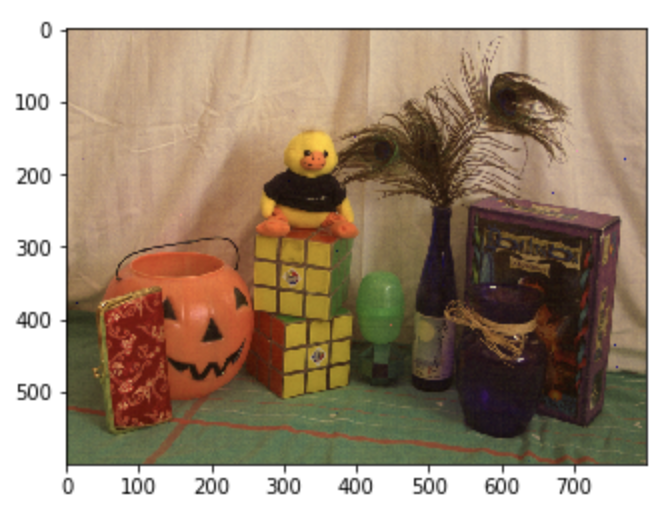

#### 5b)

See the code below: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


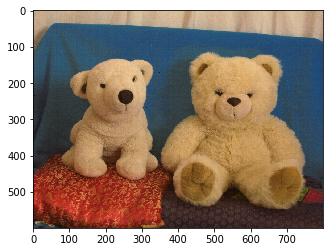

In [165]:
Bear1=io.imread("bear1.png").astype(np.float64);Bear1*=1/255.0
Bear2=io.imread("bear2.png").astype(np.float64);Bear2*=1/255.0
Bear3=io.imread("bear3.png").astype(np.float64);Bear3*=1/255.0


#Slice the color rows from each
R_Bear1=Bear1[:,:,0].reshape(480000,1)
R_Bear2=Bear2[:,:,0].reshape(480000,1)
R_Bear3=Bear3[:,:,0].reshape(480000,1)

G_Bear1=Bear1[:,:,1].reshape(480000,1)
G_Bear2=Bear2[:,:,1].reshape(480000,1)
G_Bear3=Bear3[:,:,1].reshape(480000,1)

B_Bear1=Bear1[:,:,2].reshape(480000,1)
B_Bear2=Bear2[:,:,2].reshape(480000,1)
B_Bear3=Bear3[:,:,2].reshape(480000,1)

A_Bear=np.concatenate((R_Bear1, G_Bear1, B_Bear1, R_Bear2, G_Bear2, B_Bear2, R_Bear3, G_Bear3, B_Bear3, np.ones((480000, 1))), axis=1)

bears_RGB = np.dot(A_Bear, F_matrix)
bears_tensor = np.reshape(bears_RGB, (600, 800, 3))

plt.imshow(bears_tensor)
plt.show()




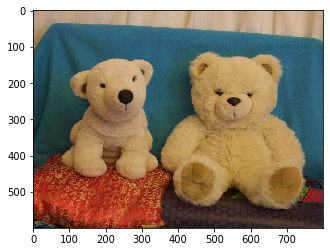

In [166]:
Bear_Orig=io.imread("regularbear.png").astype(np.float64);Bear_Orig*=1/255.0

plt.imshow(Bear_Orig)
plt.show()

In [167]:
bears_diff = bears_tensor - Bear_Orig
T = (np.linalg.norm(bears_diff)**2)/480000

print("T is", T)


T is 0.005171187563500394


So we have $T = 0.00517$, which is greater than our value for S. This is reasonable, since S was "trained" on the objects picture, not the bears picture, and thus should perform better on that than the other. 

A screenshot of the resulting picture is included below. To the naked eye, the most noticeable difference is the blue fabric behind the bears. In the reconstructed image, the blue is darker than in the original. 

Screenshot of reconstructed bear image: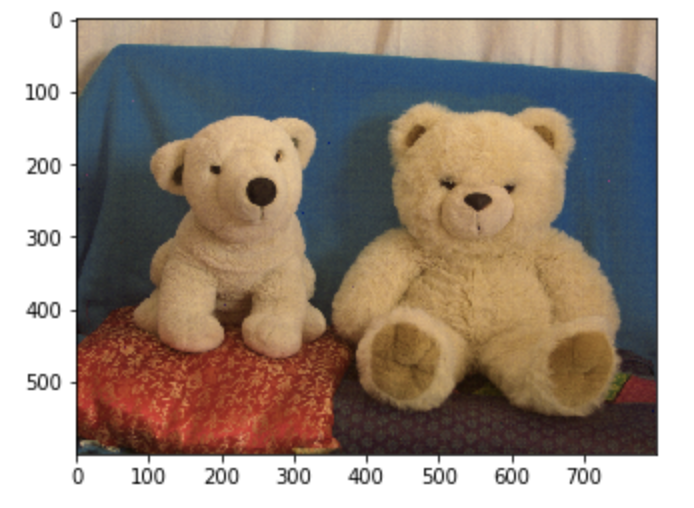



#### Citation: 
For this problem set, I spoke with Simon Warchol, Kaela Nelson, Wen Liau, and Matthieu Meeus. I used stack exchange for debugging. 